#  The top 5 countries with hight suicide rates
It further attempts to explore their differences and similarity of suicide rates in different age groups
barplot from Seaborn library is used for visualisation 



In [ ]:
# ========= Import the packages =========
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

# Importing Customised Common Data Reader Class
sys.path.append(os.path.abspath('..'))
from common_lib.data_reader import SuicideDataReader, SuicideProcessedData

In [86]:
# ========= Getting Data =========

# Use common Data Reader Class to load data
data_reader = SuicideDataReader()

# Load Suicide Rate data
suicide_rate_data = data_reader.read_data(SuicideProcessedData.SUICIDE_RATES)
suicide_rate_data

,country,sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19,all_age
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1,93.2
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8,157.1
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2,35.1
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0,65.1
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1,86.3
...,...,...,...,...,...,...,...,...,...,...,...
544,Zambia,Male,152.1,79.0,38.7,27.3,17.0,13.3,12.3,3.9,343.6
545,Zambia,Female,31.2,26.4,16.0,11.2,6.9,4.6,4.2,1.6,102.1
546,Zimbabwe,Both sexes,205.7,81.5,41.3,29.4,19.2,13.7,11.3,4.6,406.7
547,Zimbabwe,Male,285.0,111.5,62.8,47.0,30.1,22.8,19.1,6.4,584.7


In [89]:
# ========= Prepare Data ========= 
# Get the highest suicide rate country by both sexes in all_ages
top_five_suicide_rate = suicide_rate_data[(suicide_rate_data['sex'] == "Both sexes")].nlargest(5, "all_age")
top_five_suicide_rate = top_five_suicide_rate.iloc[:, 0:10]
#top_five_suicide_rate

suicide_rate_tidy_data_both_sex = pd.melt(top_five_suicide_rate, id_vars=['country', 'sex'], var_name='age',value_name='suicide_rate')
suicide_rate_tidy_data_both_sex.head()

,country,sex,age,suicide_rate
0,Lesotho,Both sexes,80_above,164.7
1,Zimbabwe,Both sexes,80_above,205.7
2,Uganda,Both sexes,80_above,153.3
3,Côte d'Ivoire,Both sexes,80_above,130.7
4,Nigeria,Both sexes,80_above,127.0


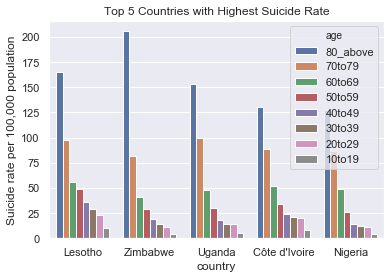

In [90]:
#=========== Plotting (1)==============#

sns.set(color_codes=True)
plot_top5_country = sns.barplot(x='country', y='suicide_rate', hue='age', data = suicide_rate_tidy_data_both_sex)
plt.title("Top 5 Countries with Highest Suicide Rate")
plt.ylabel("Suicide rate per 100,000 population")
plt.show()